# Chapter 5: Double Exponential Smoothing

With the simple exponential smoothing algorithm, we saw how we could create a simple forecast, assuming that the future of the demand would be similar to its recent past. A major issue of this simple smoothing method is that it can only see a level, and is unable to identify and project a trend.

We define the *trend* as the average variation of the time series level between two consecutive periods. Remember that the level is the average value around which the demand varies over time.

The model in this chapter will learn the trend by itself over time. It will estimate the trend based on an exponential weight $\beta$, giving more (or less) importance to the most recent observations. 

## 5.2 Double Exponential Smoothing Model

For the simple exponential smoothing model, we updated the forecast at each period partially based on:
1. the most recent observation of the demand,
2. the previous estimation of the demand (previous forecast).

The general idea behind exponential smoothing models is that each demand component (level, trend, seasonality) will be updated after each period based on two same pieces of information: the last observation and the previous estimation of this component.

The model will estimate the level with:
$$a_t = \alpha d_t + (1-\alpha)(a_{t-1} + b_{t-1}).$$

The model will update its estimation of the level $a_t$, at each period, thanks to two pieces of information: the last demand observation ($d_t$), and the previous level estimation increased by the trend $a_{t-1} + b_{t-1}$. $\alpha$ is the level learning rate, and it represents how much weight is given to the most recent level observation $d_t$.

The model will also have to estimate the trend. In order to do so, we will apply similar logic:
$$b_t = \beta(a_t - a_{t-1}) + (1-\beta)b_{t-1},$$
where $\beta$ is the learning parameter for the trend (just as $\alpha$ is for level).

Finally, we simply set the forecast for period $t+1$ as:
$$f_{t+1}=a_t + b_t.$$

Now we have a full model that we can generalize for a forecast of period $t+\lambda$:
$$a_t = \alpha d_t + (1-\alpha)(a_{t-1} + b_{t-1}),$$
$$b_t = \beta(a_t - a_{t-1}) + (1-\beta)b_{t-1},$$
$$f_{t+\lambda} = a_t + \lambda b_t.$$


As soon as we are out of the historical period:
- the trend stays constant,
- the level and the forecast are now equivalent: they are both computed as the previous level plus the ongoing trend.

Up until now, we used an additive trend, but there is also an option of using the multiplicative trend, with the following equations:
$$a_t = \alpha d_t + (1-\alpha)(a_{t-1}b_{t-1}),$$
$$b_t = \beta \frac{a_t}{a_{t-1}} + (1-\beta)b_{t-1},$$
$$f_{t+\lambda}=a_tb_t^{\lambda},$$
but these models can quickly end up with massive and wrong forecasts, esepcially for low-volume items.

## Model initialization

Experimentation will tell whcih initialization method works best for estimating level and trend ($a_0, b_0$):
- simple: $a_0=d_0, b_0=d_1 - d_0$ (in which case, the first forecast $f_1$ will be perfect),
- another way to initialize $a_0, b_0$ would be to use a linear regression of the first $n$ demand observations.

There is an interesting relationship between the forecast error and the trend. The trend decreases when the error is positive, and the trend increases when the error is negative. The intuition is that our model learns from its mistakes - if the model undershot the last demand, it will increase the trend. If it overshot the last demand, it will decrease the trend.


## Limitations

The model assumes that the trend will go on forever, which will cause issues for mid and long-term forecasts. We will solve this thanks to the damped trend model (Chapter 7). Apart from that:
- the model lacks seasonality (which will be solved via triple exponential smoothing model),
- the impossibility to take external information into account (like marketing budget or price variations)

In [1]:
import support

d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = support.double_exp_smooth(d, extra_periods=4)

In [2]:
support.kpi(df)

Bias: 2.64, 17.71%
MAPE: 28.14%
MAE: 4.38, 29.40%
RMSE: 6.26, 42.02%


<Axes: title={'center': 'Double Smoothing'}, xlabel='Period'>

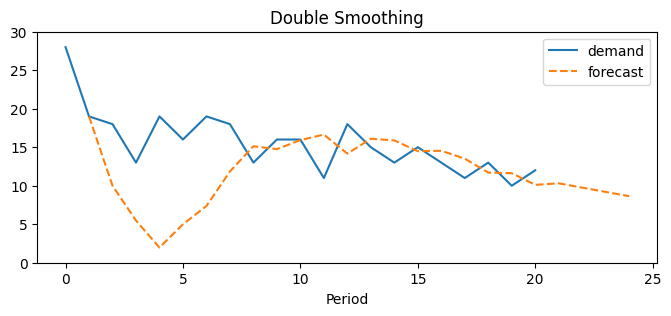

In [3]:
df.index.name = "Period"

df[["demand", "forecast"]].plot(figsize = (8, 3), title="Double Smoothing", ylim=(0, 30), style=["-", "--"])